In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Preprocessing

Objectives:
- Read in the data
- format column names
- remove na values
- check data types
- normalize data
- change to appropriate data types

#### Read data

In [68]:
salary_df = pd.read_csv('./data/Salary Dataset.csv')
salary_df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


#### Reformat column names

In [69]:
#Best practice to remove white space from column names
salary_df.columns = salary_df.columns.str.replace(' ', '_')
salary_df.head()

,Company_Name,Job_Title,Salaries_Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


#### Drop na values from the dataframe

In [70]:
print(f'na exist? {salary_df.isnull().values.any()}')
salary_df = salary_df.dropna()
print(f'na exist? {salary_df.isnull().values.any()}')

na exist? True
na exist? False


#### Check data types

In [72]:
salary_df.dtypes

Company_Name          object
Job_Title             object
Salaries_Reported    float64
Location              object
Salary                object
dtype: object

### Normalize Data (Salary)
Required actions: 
- Remove characters
- Check salary frequency and change to a consitent format (yearly) 
- Change to float type
- Convert salary to USD

In [73]:
exchange_rate = 0.013 # INR to USD rate

In [74]:
to_numeric = lambda x: float(''.join([i for i in x if i.isdigit()]))

In [75]:
salaries = salary_df['Salary']

salaries_conv = []
for s in salaries:
    s = s[1:].replace(',', '') # remove currency symbol and commas
    sal, freq = s.split('/') # split value of salary and pay frequency
    sal = to_numeric(sal) # use lambda function to ensure that the salary valoue is numeric
    if freq == 'mo':
        sal = sal * 12 # assume working 12 months a year
    elif freq == 'hr':
        sal = sal * 2048 # assume standard 2048 hours in a M-F 9-5 job
    elif freq == 'yr':
        pass # no conversion needed
    else:
        print(f'freq {freq} not in condition statement') # Check to see if any frequencies were missed
        
    sal = sal * exchange_rate # convert INR to USD
    salaries_conv.append(sal)
    
salary_df['Salary_USD_Yr'] = salaries_conv

In [ ]:
salary_df.head()

,Company_Name,Job_Title,Salaries_Reported,Location,Salary,Salary_USD_Yr
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",8431.449
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",15495.350
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",10879.362
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",8704.514
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",12273.430


## Stats and Visualizations
Objectives:
- Show group summary stats (mean, standard deviation, variance)
- Plot bar chart the average salary by location
- Plot box plot of salary by location

#### Group summary stats

In [86]:
print(set(salary_df['Location'].to_list()))
salary_df.groupby(['Location'])['Salary_USD_Yr'].agg([np.mean, np.std, np.var])

{'Bangalore', 'New Delhi', 'Mumbai', 'Pune', 'Hyderabad'}


,mean,std,var
Location,,,
Bangalore,13680.022827,13411.397771,1.798656e+08
Hyderabad,10729.413762,9175.974176,8.419850e+07
Mumbai,10443.190024,8944.536081,8.000473e+07
New Delhi,10760.410452,7841.351745,6.148680e+07
Pune,11426.150337,11195.688070,1.253434e+08


#### Bar chart (Mean Salary by Location)

In [87]:
loc_sal = salary_df.groupby(['Location'])['Salary_USD_Yr'].agg([np.mean])

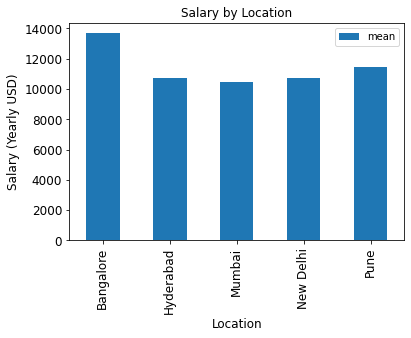

In [88]:
ax1 = loc_sal.plot.bar(title ="Salary by Location", figsize=(6, 4), fontsize=12)
ax1.set_xlabel("Location", fontsize=12)
ax1.set_ylabel("Salary (Yearly USD)", fontsize=12)
plt.show()

#### Box plot Salary by Location

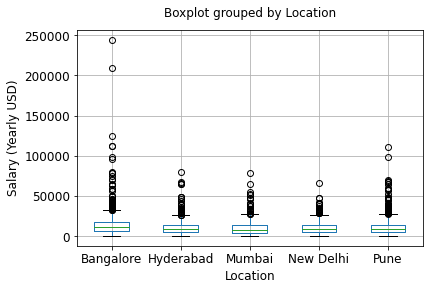

In [89]:
ax2 = salary_df.boxplot(column=['Salary_USD_Yr'], by='Location', figsize=(6, 4), fontsize=12)
ax2.set_title('')
ax2.set_xlabel("Location", fontsize=12)
ax2.set_ylabel("Salary (Yearly USD)", fontsize=12)
plt.show()